In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import sys
import numpy as np

In [2]:
# Won't be needing this step in main file as it will have more data
book_data = pd.read_csv('Kaggle API and data/Kaggle_csvData/book1-100k.csv', encoding="ISO-8859-1")

In [3]:
book_data.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [4]:
book_data.count()

Id                 58292
Name               58292
RatingDist1        58292
pagesNumber        58292
RatingDist4        58292
RatingDistTotal    58292
PublishMonth       58292
PublishDay         58292
Publisher          57798
CountsOfReview     58292
PublishYear        58292
Language           20294
Authors            58292
Rating             58292
RatingDist2        58292
RatingDist5        58292
ISBN               57746
RatingDist3        58292
dtype: int64

In [5]:
cleandf = book_data[['ISBN','Name','Authors','Language','pagesNumber','Publisher','PublishYear','Rating']]
cleandf

,ISBN,Name,Authors,Language,pagesNumber,Publisher,PublishYear,Rating
0,NaN,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,eng,652,Scholastic Inc.,2006,4.57
1,0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,eng,870,Scholastic Inc.,2004,4.50
2,NaN,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,eng,309,Scholastic Inc,2003,4.47
3,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,352,Scholastic,2003,4.42
4,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,eng,435,Scholastic Inc.,2004,4.57
...,...,...,...,...,...,...,...,...
58287,0618082956,The Best American Science and Nature Writing 2000,David Quammen,NaN,265,Mariner Books,2000,3.99
58288,0618134786,The Best American Science and Nature Writing 2002,Natalie Angier,NaN,336,Mariner Books,2002,4.11
58289,0872498220,Hunting and Home in the Southern Heartland: Th...,Archibald Hamilton Rutledge,NaN,263,University of South Carolina Press,1992,4.30
58290,0060726407,The Best American Science Writing 2004,Dava Sobel,NaN,288,Ecco,2004,3.86


In [6]:
cleandf = cleandf.dropna(how='any')

In [7]:
cleandf.count()

ISBN           19778
Name           19778
Authors        19778
Language       19778
pagesNumber    19778
Publisher      19778
PublishYear    19778
Rating         19778
dtype: int64

## Swobabika's code starts here

In [8]:
# View the dataframe
cleandf

,ISBN,Name,Authors,Language,pagesNumber,Publisher,PublishYear,Rating
1,0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,eng,870,Scholastic Inc.,2004,4.50
3,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,352,Scholastic,2003,4.42
4,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,eng,435,Scholastic Inc.,2004,4.57
6,0439682584,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",J.K. Rowling,eng,2690,Scholastic,2004,4.78
7,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,en-US,152,Nimble Books,2005,3.79
...,...,...,...,...,...,...,...,...
58260,0809093448,Thomas Paine and the Promise of America (Oxfor...,Harvey J. Kaye,eng,336,Hill and Wang,2006,3.91
58262,1593083769,Common Sense and Other Writings,Thomas Paine,eng,432,Barnes Noble Classics,2005,3.91
58265,0060957867,Faith of My Fathers: A Family Memoir,John McCain,eng,368,William Morrow Paperbacks,2000,3.86
58280,157453503X,Science Fiction: The Best of 2001,Robert Silverberg,eng,0,Fantastic Audio,2002,3.48


In [9]:
# Check datatypes of each column
cleandf.dtypes

ISBN            object
Name            object
Authors         object
Language        object
pagesNumber      int64
Publisher       object
PublishYear      int64
Rating         float64
dtype: object

In [10]:
# View Statistical overview for numerical columns
cleandf.describe()

,pagesNumber,PublishYear,Rating
count,19778.000000,19778.000000,19778.000000
mean,328.933006,1999.744059,3.925223
std,229.904903,15.500653,0.379145
min,0.000000,162.000000,0.000000
25%,195.000000,1997.000000,3.770000
50%,293.000000,2002.000000,3.960000
75%,400.000000,2005.000000,4.130000
max,6576.000000,2020.000000,5.000000


In [11]:
# Investgate why pagesNumber has minumim value of 0. (Mostly they seem to be Audiobooks) 
low_page_data= cleandf.loc[(cleandf["pagesNumber"] >= 0) & (cleandf["pagesNumber"] <= 5)]
low_page_data

,ISBN,Name,Authors,Language,pagesNumber,Publisher,PublishYear,Rating
615,0802415318,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,eng,0,Moody Publishers,2005,4.69
693,0310258979,Purpose Driven Life - For Commuters: What on E...,Rick Warren,eng,5,Zondervan,2005,3.93
1406,0743564367,The Old Man and the Sea,Ernest Hemingway,eng,3,Simon Schuster Audio,2006,3.77
1842,140015068X,The Tragedy of Pudd'nhead Wilson,Mark Twain,eng,0,Tantor Media,2003,3.79
2289,0743564677,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,eng,0,Simon Schuster Audio,2006,4.00
...,...,...,...,...,...,...,...,...
56994,067152836X,"Nixon: The Education of a Politician, 1913-1962",Stephen E. Ambrose,eng,3,Simon & Schuster,1987,4.08
57765,0061365351,James and the Giant Peach,Roald Dahl,eng,3,HarperFestival,2007,4.01
57930,1401904432,The Wisdom of Joseph Campbell,Joseph Campbell,eng,0,Hay House,2005,4.39
57992,0563523352,The Waste Land & Four Quartets,T.S. Eliot,eng,2,BBC Books,2004,4.40


In [12]:
# Investgate why PublishYear has minumim value of 162. (Looks like a wrongly entered value) 
PublishYears = cleandf['PublishYear'].unique()
PublishYears

array([2004, 2003, 2005, 2002, 1996, 2001, 2000, 1990, 1993, 1997, 1991,
       2012, 1994, 2006, 1982, 1986, 1999, 1987, 1984, 2007, 1965, 1998,
       1995, 1964, 1970, 2011, 1955, 1988, 1985, 1989, 1963, 2008, 2009,
       1975, 1992, 1973, 2019, 2015, 1919, 1921, 1923, 1969, 1968, 1961,
       1958, 1983, 1978, 1929, 1977, 1979, 1922, 1981, 1980, 1950, 1971,
       1960, 1959, 1976, 2010, 2013, 2017, 2016, 1972, 1947, 1943, 1974,
       2014, 1953, 2018, 1952, 1935, 1956, 1966, 1954, 1957, 1962, 1949,
       1913, 1928, 1914, 1925, 1967, 1900, 1931, 1940, 1951, 1946, 1942,
       1937, 1933, 1930, 1948, 1934, 1941, 1938, 1945, 1936,  162, 2020],
      dtype=int64)

In [13]:
# Filter PublisherYear column for wrongly entered data (assuming publishing year is not before 1900 and after 2021).
mainData3 = cleandf.loc[(cleandf["PublishYear"] >= 1900) & (cleandf["PublishYear"] <= 2021)]
mainData3

,ISBN,Name,Authors,Language,pagesNumber,Publisher,PublishYear,Rating
1,0439358078,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,eng,870,Scholastic Inc.,2004,4.50
3,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,352,Scholastic,2003,4.42
4,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,eng,435,Scholastic Inc.,2004,4.57
6,0439682584,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",J.K. Rowling,eng,2690,Scholastic,2004,4.78
7,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,en-US,152,Nimble Books,2005,3.79
...,...,...,...,...,...,...,...,...
58260,0809093448,Thomas Paine and the Promise of America (Oxfor...,Harvey J. Kaye,eng,336,Hill and Wang,2006,3.91
58262,1593083769,Common Sense and Other Writings,Thomas Paine,eng,432,Barnes Noble Classics,2005,3.91
58265,0060957867,Faith of My Fathers: A Family Memoir,John McCain,eng,368,William Morrow Paperbacks,2000,3.86
58280,157453503X,Science Fiction: The Best of 2001,Robert Silverberg,eng,0,Fantastic Audio,2002,3.48


## Top 10 Publishers in this dataset

In [14]:
# Get the top 10 publishers for this book data collection.
top_publishers = mainData3.groupby('Publisher')['Name'].count().sort_values().tail(10)
top_publishers

Publisher
Oxford University Press, USA    155
Pocket Books                    158
HarperCollins                   175
Bantam                          195
Harper Perennial                207
Ballantine Books                223
Mariner Books                   225
Penguin Classics                225
Penguin Books                   378
Vintage                         486
Name: Name, dtype: int64

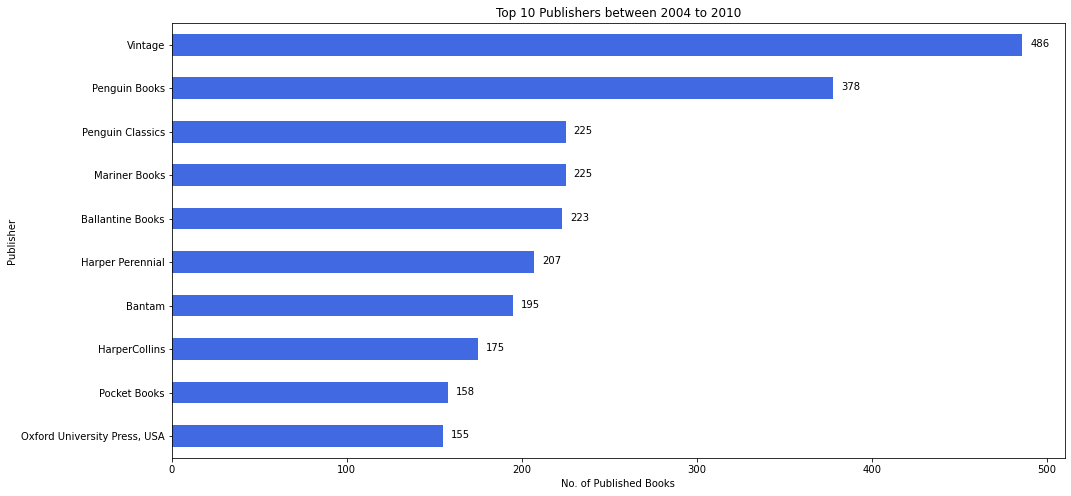

In [15]:
# Plot the top 10 publishers with highest number of published books for this book data collection..
bplot=top_publishers.plot(kind="barh",figsize=(16,8),color="royalblue")
plt.xlabel("No. of Published Books")
plt.title("Top 10 Publishers between 2004 to 2010")
for b in bplot.patches:
    width = b.get_width()
    plt.text(10+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
#plt.savefig("../01-Project_Documents/01-Presentation_Slides/Price_Output/Apt_Top10_Price.png")

## Books Published Each Decade

In [16]:
# Find the entire year duration
min_year = mainData3['PublishYear'].min()
max_year = mainData3['PublishYear'].max()
print(f'The books in this dataframe were published between {min_year} - {max_year}')

The books in this dataframe were published between 1900 - 2020


In [17]:
# Define bins of 10 years too seggregate the data.
bins=np.linspace(min_year,max_year, num=13)
labels = ["1900-1910","1911-1920", "1921-1930","1931-1940", "1941-1950","1951-1960","1961-1970","1971-1980","1981-1990",
         "1991-2000", "2001-2010", "2011-2020"]


In [18]:
# A separte dataframe with only PublisherYear data to work with
decade_df = mainData3[["PublishYear"]]
decade_df

,PublishYear
1,2004
3,2003
4,2004
6,2004
7,2005
...,...
58260,2006
58262,2005
58265,2000
58280,2002


In [19]:
# Add a new column for decade group category. 
decade_df["Decade_group"] = pd.cut(decade_df["PublishYear"], bins, labels = labels, include_lowest = True).copy()
decade_df

C:\Users\Rajeeb\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PublishYear,Decade_group
1,2004,2001-2010
3,2003,2001-2010
4,2004,2001-2010
6,2004,2001-2010
7,2005,2001-2010
...,...,...
58260,2006,2001-2010
58262,2005,2001-2010
58265,2000,1991-2000
58280,2002,2001-2010


In [20]:
# Count the number of instances(books) of each decade group.
decade_df = decade_df.groupby("Decade_group").count()
decade_df 

,PublishYear
Decade_group,
1900-1910,1
1911-1920,3
1921-1930,10
1931-1940,10
1941-1950,19
1951-1960,56
1961-1970,142
1971-1980,424
1981-1990,1424


In [21]:
# Define x and y axis as lists.
x = decade_df.index.tolist()
y = decade_df['PublishYear'].values.tolist()
print(x)
print(y)

['1900-1910', '1911-1920', '1921-1930', '1931-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020']
[1, 3, 10, 10, 19, 56, 142, 424, 1424, 5528, 11952, 208]


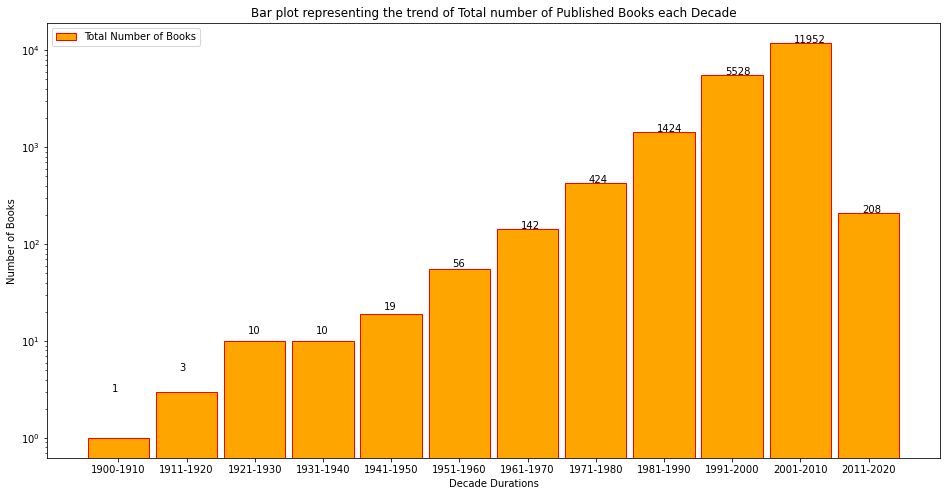

In [22]:
# Plot the bar graph
plt.figure(figsize = (16,8))
plt.yscale("log")
plt.bar(x, y, width= 0.9, align='center',color='orange', edgecolor = 'red')
i = 1.0
j = 2.0
for i in range(len(x)):
    plt.annotate(y[i], (-0.1 + i, y[i] + j))
plt.legend(labels = ['Total Number of Books'])
plt.title("Bar plot representing the trend of Total number of Published Books each Decade")
plt.xlabel('Decade Durations')
plt.ylabel('Number of Books')
plt.show()

## Correlation between Pagenumbers and ratings

The correlation between the number of pages in a book and rating is: 0.15


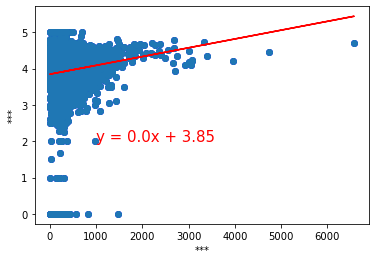

In [23]:
# Correlation between Pagenumbers and ratings.
x_values = mainData3['pagesNumber']
y_values = mainData3['Rating']
correlation = st.pearsonr(x_values,y_values)
print(f'The correlation between the number of pages in a book and rating is: {round(correlation[0],2)}')
plt.scatter(x_values,y_values, color = 'blue')
plt.xlabel('No.of Pages in a Book')
plt.ylabel('Rating')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000,2),fontsize=15,color="red")
plt.xlabel('***')
plt.ylabel('***')
plt.show()

### Observation: There seems to be a very weak correlation between number of pages of a book and it's rating. Hence, number of pages doent seem to affect the likeability of a book much. 